<a href="https://colab.research.google.com/github/Sarith99/TF_Lite_Courses/blob/main/tflite_Course_01_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [2]:
import tensorflow as tf

import pathlib
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Create a basic model of the form: y = mx + c

In [3]:
# Create a simple Keras model
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(optimizer='sgd', loss = 'mean_squared_error')
model.fit(x, y, epochs=200, verbose=1)

Epoch 1/200
1/1 [==============================] - 0s 412ms/step - loss: 0.5810
Epoch 2/200
1/1 [==============================] - 0s 12ms/step - loss: 0.5684
Epoch 3/200
1/1 [==============================] - 0s 9ms/step - loss: 0.5563
Epoch 4/200
1/1 [==============================] - 0s 12ms/step - loss: 0.5445
Epoch 5/200
1/1 [==============================] - 0s 9ms/step - loss: 0.5331
Epoch 6/200
1/1 [==============================] - 0s 13ms/step - loss: 0.5219
Epoch 7/200
1/1 [==============================] - 0s 12ms/step - loss: 0.5110
Epoch 8/200
1/1 [==============================] - 0s 10ms/step - loss: 0.5004
Epoch 9/200
1/1 [==============================] - 0s 13ms/step - loss: 0.4900
Epoch 10/200
1/1 [==============================] - 0s 11ms/step - loss: 0.4798
Epoch 11/200
1/1 [==============================] - 0s 9ms/step - loss: 0.4699
Epoch 12/200
1/1 [==============================] - 0s 10ms/step - loss: 0.4602
Epoch 13/200
1/1 [==============================] -

# Generate a SavedModel

In [4]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1/assets


# Convert the SavedModel to TFLite

In [5]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [6]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

888

# Initialize the TFLite interpreter to try it out

In [7]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [8]:
# Test the TFLite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
  input_data = np.array(np.random.random_sample(input_shape), dtype = np.float32)
  interpreter.set_tensor(input_details[0]['index'], input_data)

  interpreter.invoke()
  tflite_results = interpreter.get_tensor(output_details[0]['index'])

  # Test the Tensorflow model on random input data.
  tf_results = model(tf.constant(input_data))
  output_data = np.array(tf_results)

  inputs.append(input_data[0][0])
  outputs.append(output_data[0][0])

# Visualize the model

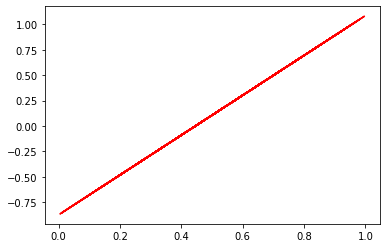

In [9]:
plt.plot(inputs, outputs, 'r')
plt.show()

# Download the TFLite model file

In [10]:
try:
  from google.colab import files
  files.download(tflite_model_file)
except:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>